In [49]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import torch.optim as optim

class SimpleFaceSketchDataset(Dataset):
    def __init__(self, photo_dir, sketch_dir, transform=None):
        self.photo_dir = photo_dir
        self.sketch_dir = sketch_dir
        self.transform = transform

        photo_filenames = set(os.listdir(photo_dir))
        sketch_filenames = set(os.listdir(sketch_dir))

        # Assuming the naming convention is consistent but just the suffix changes (e.g., _A vs. _B)
        # Adjust the logic here if the naming convention is different
        self.filenames = list(photo_filenames & sketch_filenames)

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        photo_path = os.path.join(self.photo_dir, self.filenames[idx])
        sketch_path = os.path.join(self.sketch_dir, self.filenames[idx])

        photo = Image.open(photo_path).convert("RGB")
        sketch = Image.open(sketch_path).convert("RGB")

        if self.transform:
            photo = self.transform(photo)
            sketch = self.transform(sketch)

        return photo, sketch

In [34]:
# Upzip the dataset
!unzip /content/new.zip

Archive:  /content/new.zip
  inflating: metadata.csv            
  inflating: testA/1.jpg             
  inflating: testA/10.jpg            
  inflating: testA/100.jpg           
  inflating: testA/101.jpg           
  inflating: testA/102.jpg           
  inflating: testA/103.jpg           
  inflating: testA/104.jpg           
  inflating: testA/105.jpg           
  inflating: testA/106.jpg           
  inflating: testA/11.jpg            
  inflating: testA/12.jpg            
  inflating: testA/13.jpg            
  inflating: testA/14.jpg            
  inflating: testA/15.jpg            
  inflating: testA/16.jpg            
  inflating: testA/17.jpg            
  inflating: testA/18.jpg            
  inflating: testA/19.jpg            
  inflating: testA/2.jpg             
  inflating: testA/20.jpg            
  inflating: testA/21.jpg            
  inflating: testA/22.jpg            
  inflating: testA/23.jpg            
  inflating: testA/24.jpg            
  inflating: testA/25.j

In [48]:
import cv2
import os
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
import numpy as np

photo_dir = '/content/trainA'
sketch_dir = '/content/trainB'

photo_filenames = os.listdir(photo_dir)
photos = []
sketches = []

for filename in photo_filenames:
    photo_path = os.path.join(photo_dir, filename)
    sketch_path = os.path.join(sketch_dir, filename)

    # Load images
    photo = cv2.imread(photo_path)
    sketch = cv2.imread(sketch_path)

    # Check if both images are successfully loaded
    if photo is None or sketch is None:
        print(f"Skipping {filename} as it could not be loaded.")
        continue

    print(f"Processing {filename}")

    # Convert images to RGB
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    sketch = cv2.cvtColor(sketch, cv2.COLOR_BGR2RGB)

    # Convert images to PIL Image to use torchvision transforms
    photo = transforms.ToPILImage()(photo)
    sketch = transforms.ToPILImage()(sketch)

    # Apply transformations and convert to tensor
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])

    photo = transform(photo)
    sketch = transform(sketch)

    photos.append(photo)
    sketches.append(sketch)

# Proceed with converting lists to tensors and creating DataLoader...

# Convert lists to tensor
if not photos or not sketches:
    print("No images were processed. Please check the directories and file paths.")
else:
    # Only attempt to stack if we have processed images
    photos_tensor = torch.stack(photos)
    sketches_tensor = torch.stack(sketches)

# Create TensorDataset
dataset = TensorDataset(photos_tensor, sketches_tensor)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

Skipping 368_A.jpg as it could not be loaded.
Skipping 294_A.jpg as it could not be loaded.
Skipping 109_A.jpg as it could not be loaded.
Skipping 254_A.jpg as it could not be loaded.
Skipping 332_A.jpg as it could not be loaded.
Skipping 281_A.jpg as it could not be loaded.
Skipping 121_A.jpg as it could not be loaded.
Skipping 258_A.jpg as it could not be loaded.
Skipping 382_A.jpg as it could not be loaded.
Skipping 48_A.jpg as it could not be loaded.
Skipping 120_A.jpg as it could not be loaded.
Skipping 114_A.jpg as it could not be loaded.
Skipping 80_A.jpg as it could not be loaded.
Skipping 105_A.jpg as it could not be loaded.
Skipping 252_A.jpg as it could not be loaded.
Skipping 47_A.jpg as it could not be loaded.
Skipping 70_A.jpg as it could not be loaded.
Skipping 325_A.jpg as it could not be loaded.
Skipping 217_A.jpg as it could not be loaded.
Skipping 77_A.jpg as it could not be loaded.
Skipping 349_A.jpg as it could not be loaded.
Skipping 119_A.jpg as it could not be l

NameError: name 'photos_tensor' is not defined

In [41]:
!ls /content/trainB

100_B.jpg  141_B.jpg  182_B.jpg  222_B.jpg  263_B.jpg  303_B.jpg  344_B.jpg  385_B.jpg	64_B.jpg
101_B.jpg  142_B.jpg  183_B.jpg  223_B.jpg  264_B.jpg  304_B.jpg  345_B.jpg  386_B.jpg	65_B.jpg
102_B.jpg  143_B.jpg  184_B.jpg  224_B.jpg  265_B.jpg  305_B.jpg  346_B.jpg  387_B.jpg	66_B.jpg
103_B.jpg  144_B.jpg  185_B.jpg  225_B.jpg  266_B.jpg  306_B.jpg  347_B.jpg  388_B.jpg	67_B.jpg
104_B.jpg  145_B.jpg  186_B.jpg  226_B.jpg  267_B.jpg  307_B.jpg  348_B.jpg  389_B.jpg	68_B.jpg
105_B.jpg  146_B.jpg  187_B.jpg  227_B.jpg  268_B.jpg  308_B.jpg  349_B.jpg  38_B.jpg	69_B.jpg
106_B.jpg  147_B.jpg  188_B.jpg  228_B.jpg  269_B.jpg  309_B.jpg  34_B.jpg   390_B.jpg	6_B.jpg
107_B.jpg  148_B.jpg  189_B.jpg  229_B.jpg  26_B.jpg   30_B.jpg   350_B.jpg  391_B.jpg	70_B.jpg
108_B.jpg  149_B.jpg  18_B.jpg	 22_B.jpg   270_B.jpg  310_B.jpg  351_B.jpg  392_B.jpg	71_B.jpg
109_B.jpg  14_B.jpg   190_B.jpg  230_B.jpg  271_B.jpg  311_B.jpg  352_B.jpg  393_B.jpg	72_B.jpg
10_B.jpg   150_B.jpg  191_B.jpg  231_B.jpg 

In [37]:
len(os.listdir("/content/trainB")), len(os.listdir("/content/trainA"))

(400, 400)

In [39]:
for data, label in dataloader:
  print(data.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/content/trainB/87_A.jpg'

In [51]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class PairedDataset(Dataset):
    def __init__(self, photo_dir, sketch_dir, transform=None):
        self.photo_dir = photo_dir
        self.sketch_dir = sketch_dir
        self.transform = transform

        # Ensure filenames match between photos and sketches
        self.filenames = [f for f in os.listdir(photo_dir) if os.path.isfile(os.path.join(sketch_dir, f))]

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        photo_path = os.path.join(self.photo_dir, self.filenames[idx])
        sketch_path = os.path.join(self.sketch_dir, self.filenames[idx])

        photo = Image.open(photo_path).convert("RGB")
        sketch = Image.open(sketch_path).convert("RGB")

        if self.transform is not None:
            photo = self.transform(photo)
            sketch = self.transform(sketch)

        return photo, sketch

# Define your transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Initialize your dataset
paired_dataset = PairedDataset(
    photo_dir='/content/testB',  # Update this path
    sketch_dir='/content/testA',  # Update this path
    transform=transform
)

# Create a DataLoader
dataloader = DataLoader(paired_dataset, batch_size=32, shuffle=True)

# Usage example
for photos, sketches in dataloader:
    print("Photos Batch Shape:", photos.shape)
    print("Sketches Batch Shape:", sketches.shape)
    # Here, photos and sketches are paired

Photos Batch Shape: torch.Size([32, 3, 256, 256])
Sketches Batch Shape: torch.Size([32, 3, 256, 256])
Photos Batch Shape: torch.Size([32, 3, 256, 256])
Sketches Batch Shape: torch.Size([32, 3, 256, 256])
Photos Batch Shape: torch.Size([32, 3, 256, 256])
Sketches Batch Shape: torch.Size([32, 3, 256, 256])
Photos Batch Shape: torch.Size([10, 3, 256, 256])
Sketches Batch Shape: torch.Size([10, 3, 256, 256])


In [83]:
import torch
import torch.nn as nn

class Downsample(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=4, apply_batchnorm=True):
        super(Downsample, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=2, padding=1, bias=False)
        self.activation = nn.LeakyReLU(0.2)
        self.batchnorm = nn.BatchNorm2d(out_channels) if apply_batchnorm else None

    def forward(self, x):
        x = self.conv(x)
        if self.batchnorm:
            x = self.batchnorm(x)
        x = self.activation(x)
        return x

class Upsample(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=4, apply_dropout=False):
        super(Upsample, self).__init__()
        self.conv = nn.ConvTranspose2d(in_channels * 2, out_channels, kernel_size, stride=2, padding=1, bias=False)
        self.activation = nn.ReLU()
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.dropout = nn.Dropout(0.5) if apply_dropout else None

    def forward(self, x, skip):
        # Resize skip to match x's dimensions if they don't match
        if x.size()[2:] != skip.size()[2:]:
            skip = nn.functional.interpolate(skip, size=x.size()[2:], mode='nearest')
        x = torch.cat([x, skip], 1)
        x = self.conv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = self.dropout(x)
        x = self.activation(x)
        return x


class Generator(nn.Module):
    def __init__(self, in_channels=3, features=64):
        super(Generator, self).__init__()
        self.down1 = Downsample(in_channels, features, apply_batchnorm=False)
        self.down2 = Downsample(features, features * 2)
        self.down3 = Downsample(features * 2, features * 4)
        self.down4 = Downsample(features * 4, features * 8)
        self.down5 = Downsample(features * 8, features * 8)
        self.down6 = Downsample(features * 8, features * 8)
        self.down7 = Downsample(features * 8, features * 8)

        self.bottleneck = nn.Sequential(
            nn.Conv2d(features * 8, features * 8, 4, 2, 1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(features * 8)
        )

        self.up1 = Upsample(features * 8, features * 8, apply_dropout=True)
        self.up2 = Upsample(features * 8, features * 8, apply_dropout=True)
        self.up3 = Upsample(features * 8, features * 8, apply_dropout=True)
        self.up4 = Upsample(features * 8, features * 8)
        self.up5 = Upsample(features * 8, features * 4)
        self.up6 = Upsample(features * 4, features * 2)
        self.up7 = Upsample(features * 2, features)

        self.final = nn.ConvTranspose2d(features * 2, 3, 4, 2, 1)  # Adjusted to match the input channels
        self.tanh = nn.Tanh()

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)
        d5 = self.down5(d4)
        d6 = self.down6(d5)
        d7 = self.down7(d6)

        bottleneck = self.bottleneck(d7)

        up1 = self.up1(bottleneck, d7)
        up2 = self.up2(up1, d6)
        up3 = self.up3(up2, d5)
        up4 = self.up4(up3, d4)
        up5 = self.up5(up4, d3)
        up6 = self.up6(up5, d2)
        up7 = self.up7(up6, d1)

        return self.tanh(self.final(up7))


In [75]:
# g = Generator()
# g(32, 3, 256, 256).shape

In [76]:
class Discriminator(nn.Module):
    def __init__(self, in_channels=3, features=64):
        super(Discriminator, self).__init__()
        self.head = nn.Sequential(
            nn.Conv2d(in_channels * 2, features, 4, 2, 1),
            nn.LeakyReLU(0.2)
        )

        self.body = nn.Sequential(
            Downsample(features, features * 2),
            Downsample(features * 2, features * 4),
            Downsample(features * 4, features * 8, apply_batchnorm=True),
            nn.Conv2d(features * 8, 1, 4, padding=1)
        )

    def forward(self, x, y):
        x = torch.cat([x, y], 1)  # concatenate input and target images along the channel dimension
        x = self.head(x)
        return self.body(x)


In [77]:
d = Discriminator()

In [84]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the generator and discriminator
gen = Generator().to(device)
disc = Discriminator().to(device)

# Losses
criterion_GAN = nn.BCEWithLogitsLoss()
criterion_pixelwise = nn.L1Loss()

# Optimizers
optimizer_G = optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Hyperparameters
lambda_pixel = 100  # Weight for L1 loss term


In [103]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class Generator(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Generator, self).__init__()

        self.c0 = nn.Conv2d(in_channels, 64, 4, stride=2, padding=1)
        self.c1 = nn.Conv2d(64, 128, 4, stride=2, padding=1)
        self.c2 = nn.Conv2d(128, 256, 4, stride=2, padding=1)
        self.c3 = nn.Conv2d(256, 512, 4, stride=2, padding=1)
        self.c4 = nn.Conv2d(512, 512, 4, stride=2, padding=1)
        self.c5 = nn.Conv2d(512, 512, 4, stride=2, padding=1)
        self.c6 = nn.Conv2d(512, 512, 4, stride=2, padding=1)
        self.c7 = nn.Conv2d(512, 512, 4, stride=2, padding=1)

        self.d7 = nn.ConvTranspose2d(512, 512, 4, stride=2, padding=1)
        self.d6 = nn.ConvTranspose2d(1024, 512, 4, stride=2, padding=1)
        self.d5 = nn.ConvTranspose2d(1024, 512, 4, stride=2, padding=1)
        self.d4 = nn.ConvTranspose2d(1024, 512, 4, stride=2, padding=1)
        self.d3 = nn.ConvTranspose2d(1024, 256, 4, stride=2, padding=1)
        self.d2 = nn.ConvTranspose2d(512, 128, 4, stride=2, padding=1)
        self.d1 = nn.ConvTranspose2d(256, 64, 4, stride=2, padding=1)
        self.d0 = nn.ConvTranspose2d(128, out_channels, 4, stride=2, padding=1)

        self.bnc1 = nn.BatchNorm2d(128)
        self.bnc2 = nn.BatchNorm2d(256)
        self.bnc3 = nn.BatchNorm2d(512)
        self.bnc4 = nn.BatchNorm2d(512)
        self.bnc5 = nn.BatchNorm2d(512)
        self.bnc6 = nn.BatchNorm2d(512)

        self.bnd7 = nn.BatchNorm2d(512)
        self.bnd6 = nn.BatchNorm2d(512)
        self.bnd5 = nn.BatchNorm2d(512)
        self.bnd4 = nn.BatchNorm2d(512)
        self.bnd3 = nn.BatchNorm2d(256)
        self.bnd2 = nn.BatchNorm2d(128)
        self.bnd1 = nn.BatchNorm2d(64)

    def forward(self, x):
        en0 = self.c0(x)
        en1 = self.bnc1(self.c1(F.leaky_relu(en0, negative_slope=0.2)))
        en2 = self.bnc2(self.c2(F.leaky_relu(en1, negative_slope=0.2)))
        en3 = self.bnc3(self.c3(F.leaky_relu(en2, negative_slope=0.2)))
        en4 = self.bnc4(self.c4(F.leaky_relu(en3, negative_slope=0.2)))
        en5 = self.bnc5(self.c5(F.leaky_relu(en4, negative_slope=0.2)))
        en6 = self.bnc6(self.c6(F.leaky_relu(en5, negative_slope=0.2)))
        en7 = self.c7(F.leaky_relu(en6, negative_slope=0.2))

        de7 = self.bnd7(self.d7(F.relu(en7)))
        de6 = F.dropout(self.bnd6(self.d6(F.relu(torch.cat((en6, de7),1)))))
        de5 = F.dropout(self.bnd5(self.d5(F.relu(torch.cat((en5, de6),1)))))

        de4 = F.dropout(self.bnd4(self.d4(F.relu(torch.cat((en4, de5),1)))))
        de3 = self.bnd3(self.d3(F.relu(torch.cat((en3, de4),1))))
        de2 = self.bnd2(self.d2(F.relu(torch.cat((en2, de3),1))))
        de1 = self.bnd1(self.d1(F.relu(torch.cat((en1, de2),1))))

        de0 = F.tanh(self.d0(F.relu(torch.cat((en0, de1),1))))

        return de0


class Discriminator(nn.Module):
    def __init__(self, in_channels1, in_channels2):
        super(Discriminator, self).__init__()

        self.c0 = nn.Conv2d(in_channels1 + in_channels2, 64, 4, stride=2, padding=2)
        self.c1 = nn.Conv2d(64, 128, 4, stride=2, padding=2)
        self.c2 = nn.Conv2d(128, 256, 4, stride=2, padding=2)
        self.c3 = nn.Conv2d(256, 512, 4, stride=1, padding=2)
        self.c4 = nn.Conv2d(512, 1, 4, stride=1, padding=2)

        self.bnc1 = nn.BatchNorm2d(128)
        self.bnc2 = nn.BatchNorm2d(256)
        self.bnc3 = nn.BatchNorm2d(512)

    def forward(self, x1, x2):
        h = self.c0(torch.cat((x1, x2),1))
        h = self.bnc1(self.c1(F.leaky_relu(h, negative_slope=0.2)))
        h = self.bnc2(self.c2(F.leaky_relu(h, negative_slope=0.2)))
        h = self.bnc3(self.c3(F.leaky_relu(h, negative_slope=0.2)))
        h = self.c4(F.leaky_relu(h, negative_slope=0.2))
        h = F.sigmoid(h)

        return h

In [104]:
import numpy as np
import cv2

import argparse

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm2d') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [105]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the generator and discriminator
gen = Generator(3, 3).to(device)
disc = Discriminator(3, 3).to(device)
gen.apply(weights_init)
disc.apply(weights_init)

# Losses
criterion_GAN = nn.BCEWithLogitsLoss()
criterion_pixelwise = nn.L1Loss()

# Optimizers
optimizer_G = optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay= 0.00001)
optimizer_D = optim.Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay= 0.00001)

# Hyperparameters
lambda_pixel = 100  # Weight for L1 loss term

In [ ]:
num_epochs = 400
batch_size = 1  # Pix2pix often uses a batch size of 1 due to memory constraints
for epoch in range(num_epochs):
    for i, (real_A, real_B) in enumerate(dataloader):
        real_A = real_A.to(device)
        real_B = real_B.to(device)

        # Generate a batch of fake images
        fake_B = gen(real_A)

        # Generate discriminator predictions for fake images
        pred_fake = disc(fake_B, real_A)

        # Dynamically resize the real and fake labels to match the batch size
        current_batch_size = real_A.size(0)  # Get the current batch size from real_A or real_B
        real_label = torch.ones((current_batch_size, 1, 35, 35), device=device)
        fake_label = torch.zeros((current_batch_size, 1, 35, 35), device=device)

        # Proceed with calculating the loss and updating the models
        # Make sure to recalculate pred_fake if necessary before using it for loss calculation

        # Train Generator
        optimizer_G.zero_grad()
        # Recalculate pred_fake if necessary
        loss_GAN = criterion_GAN(pred_fake, real_label)
        loss_pixel = criterion_pixelwise(fake_B, real_B)
        loss_G = loss_GAN + lambda_pixel * loss_pixel
        loss_G.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        pred_real = disc(real_B, real_A)
        loss_D_real = criterion_GAN(pred_real, real_label)
        pred_fake = disc(fake_B.detach(), real_A)
        loss_D_fake = criterion_GAN(pred_fake, fake_label)
        loss_D = 0.5 * (loss_D_real + loss_D_fake)
        loss_D.backward()
        optimizer_D.step()

        print(f"[Epoch {epoch}/{num_epochs}] [Batch {i}/{len(dataloader)}] [D loss: {loss_D.item()}] [G loss: {loss_G.item()}]")


[Epoch 0/400] [Batch 0/4] [D loss: 0.7332414388656616] [G loss: 51.794395446777344]
[Epoch 0/400] [Batch 1/4] [D loss: 0.7170655727386475] [G loss: 48.099876403808594]
[Epoch 0/400] [Batch 2/4] [D loss: 0.7164390087127686] [G loss: 43.64659118652344]
[Epoch 0/400] [Batch 3/4] [D loss: 0.6885228753089905] [G loss: 38.84189224243164]
[Epoch 1/400] [Batch 0/4] [D loss: 0.6796176433563232] [G loss: 39.33049392700195]
[Epoch 1/400] [Batch 1/4] [D loss: 0.6504305005073547] [G loss: 38.26371383666992]
[Epoch 1/400] [Batch 2/4] [D loss: 0.6341036558151245] [G loss: 32.62158203125]
[Epoch 1/400] [Batch 3/4] [D loss: 0.6152850389480591] [G loss: 33.85399627685547]
[Epoch 2/400] [Batch 0/4] [D loss: 0.6210481524467468] [G loss: 29.473407745361328]
[Epoch 2/400] [Batch 1/4] [D loss: 0.6539029479026794] [G loss: 29.669687271118164]
[Epoch 2/400] [Batch 2/4] [D loss: 0.6021341681480408] [G loss: 28.662281036376953]
[Epoch 2/400] [Batch 3/4] [D loss: 0.6187058687210083] [G loss: 26.770221710205078]
[

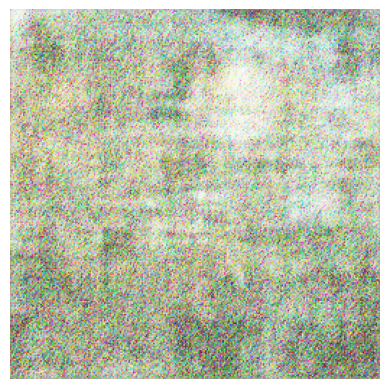

In [102]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Normalize, Compose

# # Assuming Generator class is defined somewhere above
# # Initialize the model and load the trained weights
# generator = Generator(in_channels=3, out_channels=3)  # Adjust channels if needed
# generator.load_state_dict(torch.load('generator_G.pth'))  # Load the trained weights
# generator.eval()  # Set to evaluation mode

# Prepare your input data
# For demonstration, let's create a random noise image as input
# In practice, you should replace this with your actual input data
transform = Compose([
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Assuming normalization used during training
])
input_data = torch.randn(1, 3, 256, 256).to(device)  # Example input (batch_size, channels, height, width)
# input_data = transform(input_data)  # Apply necessary transformations

# Generate the image
with torch.no_grad():
    generated_image = gen(input_data)  # Add batch dimension if needed

# Post-process the generated image for display
# generated_image = generated_image.squeeze(0)  # Remove batch dimension
# generated_image = (generated_image + 1) / 2  # Rescale from [-1, 1] to [0, 1] for displaying
# generated_image = generated_image.clamp(0, 1)  # Clamp values to valid range

# Convert to NumPy and display
generated_image_np = generated_image.detach().cpu().permute(1, 2, 0).numpy()
generated_image_np = (generated_image_np - generated_image_np.min())/(generated_image_np.max() - generated_image_np.min())  # Convert to HWC format for matplotlib
plt.imshow(generated_image_np)
plt.axis('off')  # Hide axes
plt.show()